# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data_final.csv')

In [3]:
df

,text_clean,sentiment,sentiment_
0,surat rekom petinggi ganyantumin pangkat golong,0.000000,0
1,lupa terima total daftar,0.000000,0
2,kemarin isi yogyakarta domisili,0.000000,0
3,gim nih lupa correct beasiswa lupa kk solusi ap,0.000000,0
4,sedih masuk angkat,-33.333333,-1
...,...,...,...
1869,cerita inspiratif msib ngirit bbh turun,16.666667,1
1870,sekal masuk feed haha,0.000000,0
1871,waww,0.000000,0
1872,capernya,0.000000,0


# Inisiasi X dan y

In [4]:
X = df['text_clean']
y = df['sentiment_']

# Data Latih

In [5]:
data_latih =  pd.read_csv('X_test.csv')
X_test,y_test = data_latih['X_test'],data_latih['y_test']

In [6]:
svm = make_pipeline(CountVectorizer(),SVC(kernel='rbf'))
svm.fit(X,y)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [7]:
predict = svm.predict(X_test)

In [19]:
data_latih.to_excel("data_latih.xlsx", index=False)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[ 19,  11,   1],
       [  0, 270,   1],
       [  0,   6,  67]], dtype=int64)

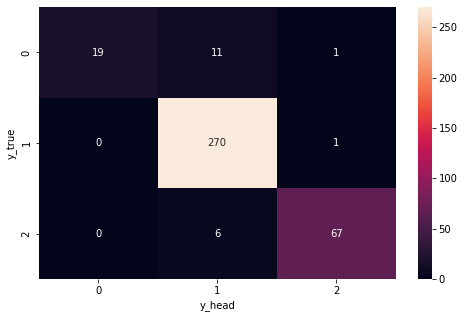

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [8]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

          -1       0.61      1.00      0.76        19
           0       1.00      0.94      0.97       287
           1       0.92      0.97      0.94        69

    accuracy                           0.95       375
   macro avg       0.84      0.97      0.89       375
weighted avg       0.96      0.95      0.95       375

